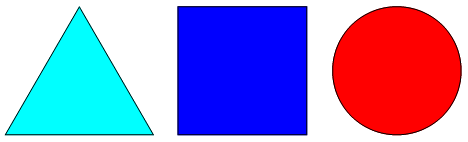

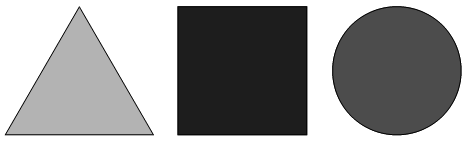

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


img_src = "../../images/hough/test-image.png"
# Load the image
image = cv2.imread(img_src)
gray = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)

# plt.imshow(image)
# plt.show()
display(Image.fromarray(image))
display(Image.fromarray(gray))


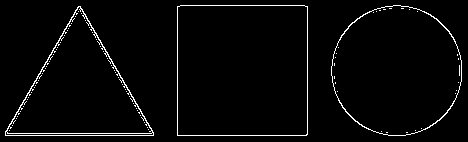

In [2]:

# Perform edge detection using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
display(Image.fromarray(edges))


Detected 8 lines


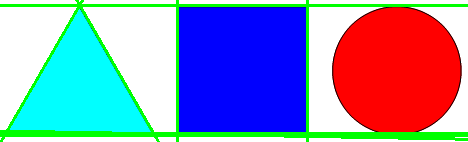

In [7]:

# Detect lines using the Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

print(f"Detected {len(lines)} lines")
# Draw the lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the result

display(Image.fromarray(image))
